# Part I - (Ford GoBike dataset analysis )

## by (Saad Maani)

## Introduction : 

Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

On June 28, 2017, the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels on June 11, 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.
 
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sb
import math
import os
import requests
from zipfile import ZipFile
from io import BytesIO
%matplotlib inline

In [2]:
#Creating the file we'll be storing our data in
os.makedirs('ford-gobike-trip-data')

In [3]:
#Downloading all the other files
urls = ['https://s3.amazonaws.com/fordgobike-data/201801-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201802-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201803-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201804-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201805-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201806-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201807-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201808-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201809-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201810-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201811-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201812-fordgobike-tripdata.csv.zip',]

for url in urls:
    response = requests.get(url)
    zip_file = ZipFile(BytesIO(response.content))
    zip_file.extractall('ford-gobike-trip-data')

In [4]:
#Congregating together all the datasets to be stitched into a dataframe in the next cell
path = r'ford-gobike-trip-data'
raw_dfs = []

for file in os.listdir(path):
    raw_dfs.append(pd.read_csv(path + '/' + file))


In [5]:
#Stitching the datasets together into a dataframe

df = pd.concat(raw_dfs, sort=False)


In [6]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,79489,2018-11-30 13:40:32.7690,2018-12-01 11:45:21.9720,NaN,NaN,37.420000,-121.940000,NaN,NaN,37.410000,-121.940000,4105,Customer,1982.0,Female,No
1,42847,2018-11-30 20:13:45.5090,2018-12-01 08:07:53.1330,37.0,2nd St at Folsom St,37.785000,-122.395936,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2614,Customer,1992.0,Male,No
2,1128,2018-11-30 23:58:26.4310,2018-12-01 00:17:14.4880,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,-122.253253,1496,Subscriber,1998.0,Male,Yes
3,2476,2018-11-30 23:35:06.7230,2018-12-01 00:16:23.4740,104.0,4th St at 16th St,37.767045,-122.390833,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1334,Subscriber,1959.0,Male,No
4,1273,2018-11-30 23:54:12.3890,2018-12-01 00:15:26.3680,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,60.0,8th St at Ringold St,37.774520,-122.409449,393,Subscriber,1993.0,Female,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 199221
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 241.7+ MB


In [8]:
df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [9]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [10]:
df.duplicated().sum()

0

# Quality issues

In [11]:
df.dropna(inplace = True)
df['start_time'] = pd.to_datetime(df.start_time) 
df['end_time'] = pd.to_datetime(df.end_time) 
df['member_birth_year'] = df['member_birth_year'].astype(float).astype(int)
df['end_station_id'] = df['end_station_id'].astype(float).astype(int)
df['start_station_id'] = df['start_station_id'].astype(float).astype(int)


# Data augmenting:

In [12]:
df['date'] = df['start_time'].dt.strftime('%m-%d')
df['start_month'] = df['start_time'].dt.month
df['start_day'] = df['start_time'].dt.day_name()
df['start_day_num'] = df['start_time'].dt.day
df['start_hour'] = df.start_time.dt.hour
df['member_age'] = 2018-df['member_birth_year']
df['duration_min'] = df['duration_sec'] / 60
df['trip'] = df['start_station_name'] +"  -  "+ df['end_station_name'] 



In [13]:
def distance(origin, destination):

    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [14]:
df['distance_km'] = df.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)
df['distance_in_m'] = df['distance_km'] * 1000


In [15]:
df.drop(['duration_sec', 'distance_km', 'start_station_id', 'end_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741556 entries, 1 to 199221
Data columns (total 18 columns):
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_name         object
end_station_name           object
bike_id                    int64
user_type                  object
member_birth_year          int64
member_gender              object
bike_share_for_all_trip    object
date                       object
start_month                int64
start_day                  object
start_day_num              int64
start_hour                 int64
member_age                 int64
duration_min               float64
trip                       object
distance_in_m              float64
dtypes: datetime64[ns](2), float64(2), int64(6), object(8)
memory usage: 252.5+ MB


In [17]:
df.isnull().sum()


start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
date                       0
start_month                0
start_day                  0
start_day_num              0
start_hour                 0
member_age                 0
duration_min               0
trip                       0
distance_in_m              0
dtype: int64

In [18]:
# I'm going to save the cleaned dataset into a csv file for our next explanatory analysis.
df.to_csv('2018_ford_gobike.csv')


### What is the structure of your dataset?

> The dataset includes 2342985 entries and 16 columns

### What is/are the main feature(s) of interest in your dataset?

> The dataset is a collection of Ford Gobike records from 2018 in San Francisco, California, this collection of data serves to study the usage behavior of their subscribers and casual customers in a way that could help Ford to offer a better user experience.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> After augmenting the data and concluding more information like the distance traveled trips,... that could help us to get more details about how the user of Ford GoBike really uses the service. 

## Univariate Exploration

### Question 1: 
Which day of the week has more rides ?

In [19]:
# First we have to create some masks
Subscriber = df.user_type == 'Subscriber'
Customer = df.user_type == 'Customer'

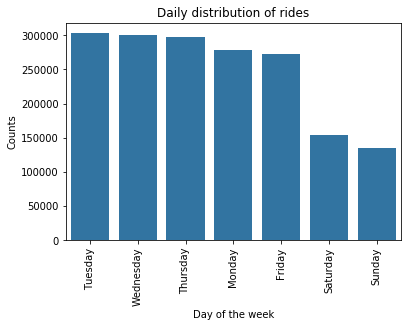

In [20]:
start_day_order = df['start_day'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='start_day', color=base_color, order = start_day_order )
plt.xticks(rotation=90)
plt.xlabel('Day of the week')
plt.ylabel('Counts')
plt.title('Daily distribution of rides');

### Insight 1:
We can notice that Thursday has the most count of rides while, Saturday and Sanday have the least amount of rides.

### Question 2: 
Which time of the day has more rides ?

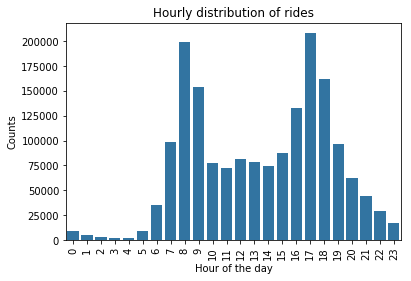

In [21]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='start_hour', color=base_color)
plt.xticks(rotation=90)
plt.xlabel('Hour of the day')
plt.ylabel('Counts')
plt.title('Hourly distribution of rides');

### Insight 2:
We can notice that 8am and 5pm have the most count of rides while, plus the previous insight we can suspect that most users of the GoBike servers are using it to go to their jobs.

### Question 3: 
Which month has more rides ?

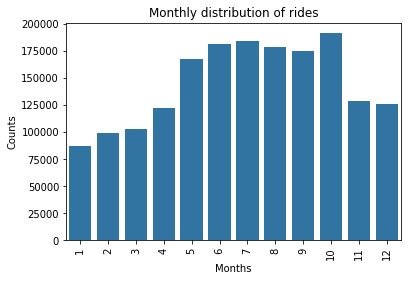

In [22]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='start_month', color=base_color)
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Counts')
plt.title('Monthly distribution of rides');

### Question 4: 
Which station are more frequents ?

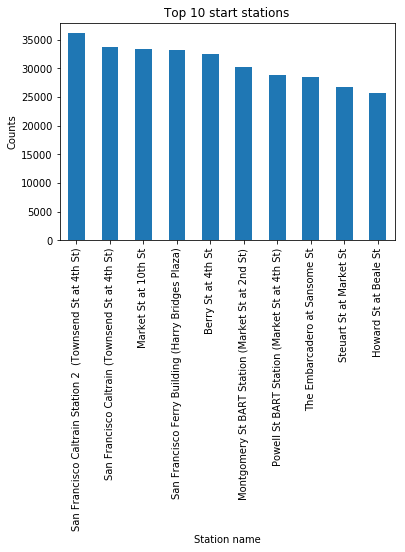

In [23]:
base_color = sb.color_palette()[0]
start_station_order = df['start_station_name'].value_counts().head(10)
start_station_order.plot(kind = 'bar', color = base_color)
plt.title("Top 10 start stations")
plt.xlabel("Station name")
plt.ylabel("Counts");

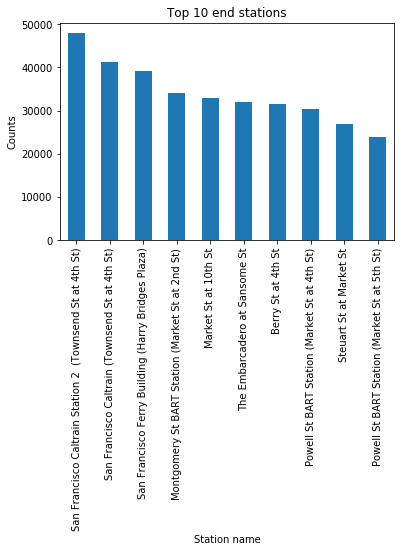

In [24]:
base_color = sb.color_palette()[0]
end_station_order = df['end_station_name'].value_counts().head(10)
end_station_order.plot(kind = 'bar', color = base_color)
plt.title("Top 10 end stations")
plt.xlabel("Station name")
plt.ylabel("Counts");


### Insight 4:
We can notice that the most frequent station is San Francisco Calttrain 2 with  nearly 50000 counts as the start and 65000 counts as the end.  

### Question 5: 
Which trips are more frequents ?

In [25]:
trip = df.trip.value_counts().head(10)

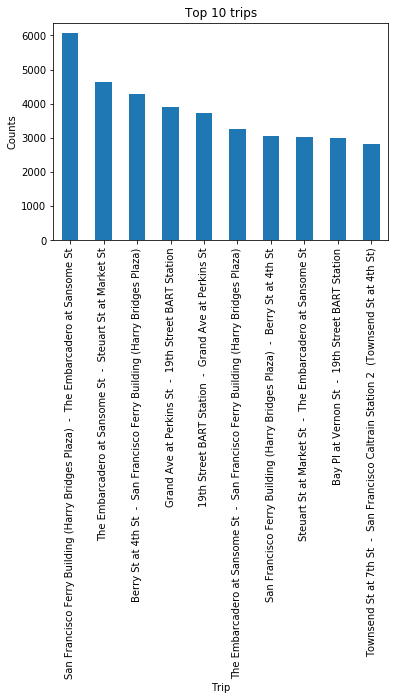

In [26]:
trip.plot(kind = 'bar', color = base_color)
plt.title("Top 10 trips")
plt.xlabel("Trip")
plt.ylabel("Counts");

### Question 5: 
Which age are more frequents ?

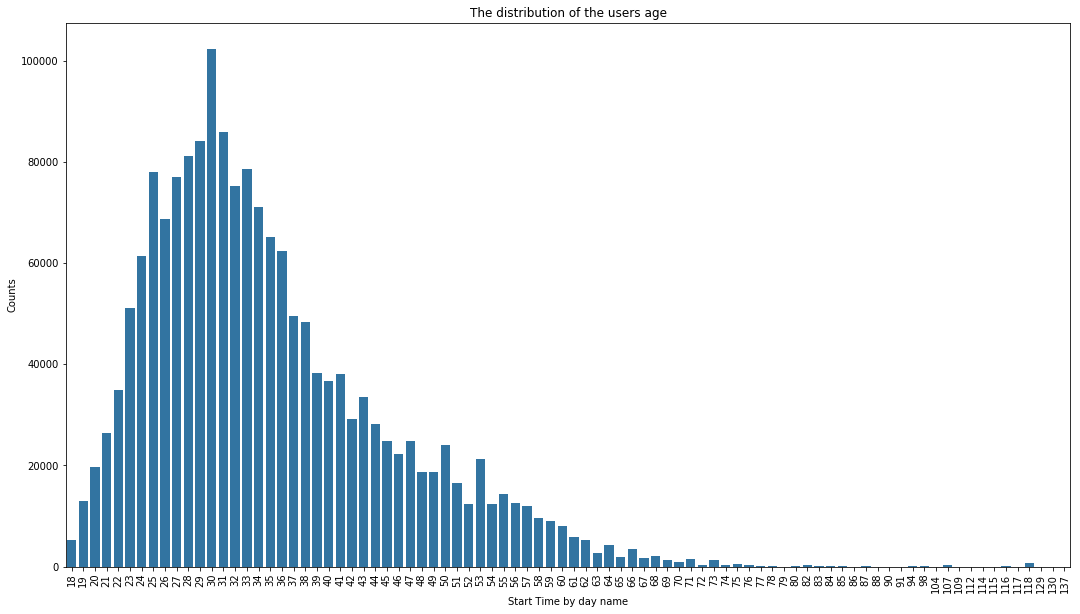

In [27]:
ax = plt.subplots(figsize = (18,10))
ax = sb.countplot(data=df, x='member_age', color=base_color)
plt.xticks(rotation=90)
plt.title("The distribution of the users age")
plt.xlabel("Start Time by day name")
plt.ylabel("Counts");


## Bivariate Exploration


In [28]:
# We are to going to create some masks first:
Subscriber = df.user_type == 'Subscriber'
Customer = df.user_type == 'Customer'

### Question 6: 
Let's investigate more about our previous insight that says people uses the gobike to go to their work.

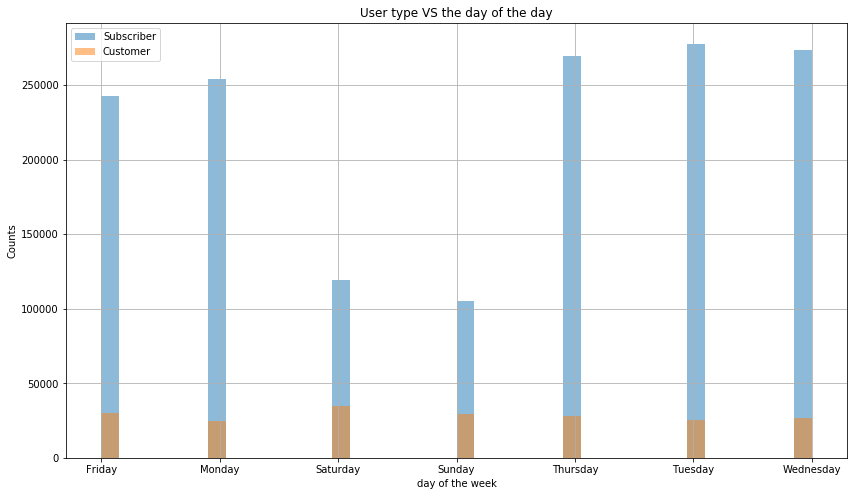

In [29]:
plt.figure(figsize=[14,8])
df.start_day[Subscriber].hist(alpha=0.5, bins=40, label='Subscriber')
df.start_day[Customer].hist(alpha=0.5, bins=40, label='Customer')
plt.title("User type VS the day of the day")
plt.xlabel('day of the week')
plt.ylabel("Counts")
plt.legend();


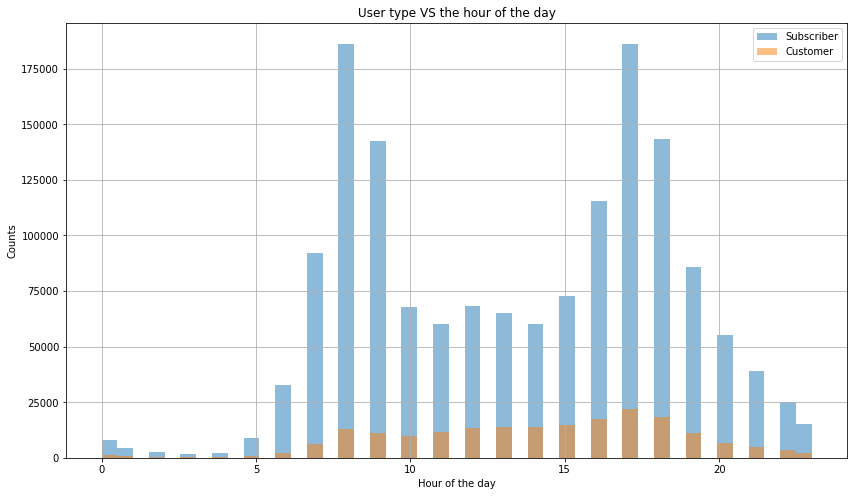

In [30]:
plt.figure(figsize=[14,8])
df.start_hour[Subscriber].hist(alpha=0.5, bins=45, label='Subscriber')
df.start_hour[Customer].hist(alpha=0.5, bins=45, label='Customer')
plt.title("User type VS the hour of the day")
plt.ylabel("Counts")
plt.xlabel('Hour of the day')
plt.legend();

### Insight: 
I think that the two histogram above says that most subscribers are using bikes to go to work because there is a considerable drop in usage after 8 am and 5 pm, on the contrary for the casual customers whose usage is better distributed.

### Question 7: 
User type vs Monthly use:

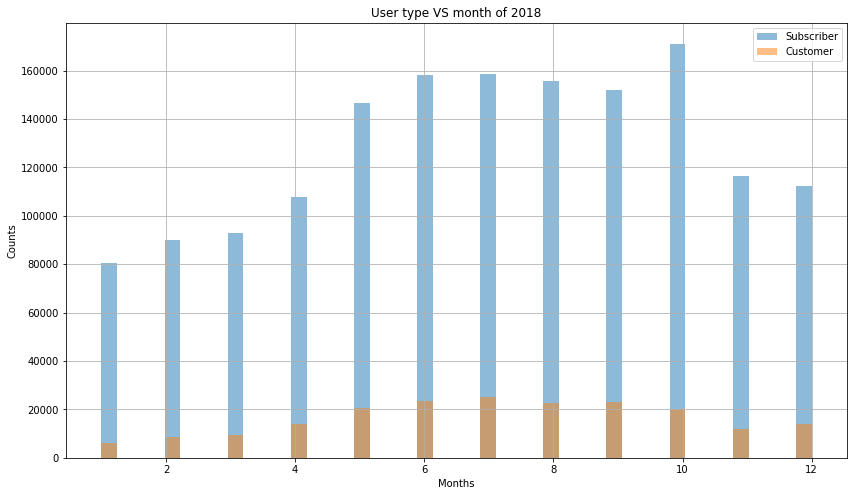

In [31]:
plt.figure(figsize=[14,8])
df.start_month[Subscriber].hist(alpha=0.5, bins=45, label='Subscriber')
df.start_month[Customer].hist(alpha=0.5, bins=45, label='Customer')
plt.title("User type VS month of 2018")
plt.ylabel("Counts")
plt.xlabel('Months')
plt.legend();

### Question 8: 
How much time on average did each user type uses the bike?

In [32]:
average_duration = df.groupby('user_type')['duration_min'].mean()

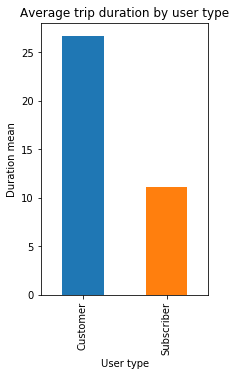

In [33]:
plt.subplots(figsize = (3,5))
average_duration.plot(kind = 'bar')
plt.title("Average trip duration by user type")
plt.xlabel("User type")
plt.ylabel("Duration mean");

### Insight: 
We can see that the casual customer uses the bike twice more than the subscriber who uses the bike only for 10 min per ride. 

### Question 9: 
How much distance on average did each user type uses the bike?

In [34]:
average_distance = df.groupby('user_type')['distance_in_m'].mean()

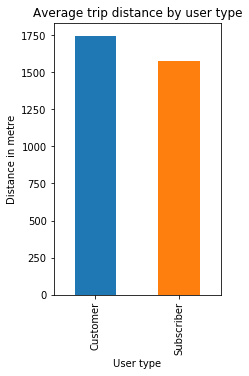

In [35]:
plt.subplots(figsize = (3,5))
average_distance.plot(kind = 'bar')
plt.title("Average trip distance by user type")
plt.xlabel("User type")
plt.ylabel("Distance in metre");

### Insight: 
We can see there is no big difference between the distance traveled by customer or subscriber but, what we concluded from the insight above that customers in average use the bike twice the time than the subscribers, maybe because subscribes are more used to ride the bike and too because most of the time they are using it to go to work so, they need to hurry up and be in time. 

### Question 10: 
Which columns are correlated with each other?

In [36]:
#First we have to let the whole data set numerized.
df1 = df.copy()
for col_name in df1.columns:
    if(df1[col_name].dtypes == 'object'):
        df1[col_name] = df1[col_name].astype('category')
        df1[col_name] = df1[col_name].cat.codes

In [37]:
numeric_vars1 = ['start_time', 'end_time', 'start_station_name', 'end_station_name',
       'user_type', 'member_gender',
       'bike_share_for_all_trip', 'date', 'start_month', 'start_day',
       'start_day_num', 'start_hour', 'member_age', 'duration_min', 'trip',
       'distance_in_m']

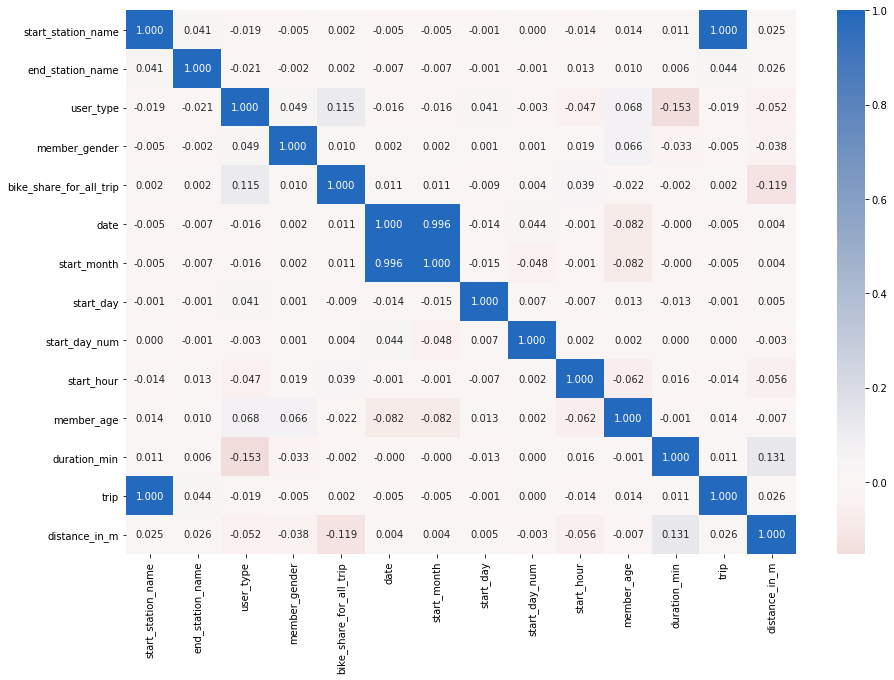

In [38]:
# correlation plot
plt.figure(figsize = [15, 10])
sb.heatmap(df1[numeric_vars1].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### Insight:
There is no significant correlation between the columns.

### Question 11: 
What is the total of trips per day of the week per user type?

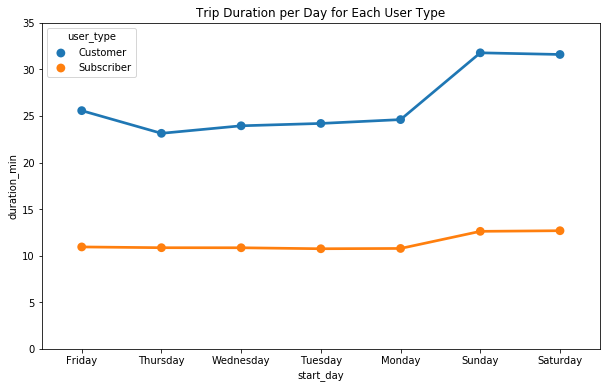

In [39]:
plt.figure(figsize=(10,6))
sb.pointplot(data=df, x='start_day', y='duration_min', hue = "user_type", ci=None)
plt.ylim(0,35)
plt.title("Trip Duration per Day for Each User Type")
plt.show()

### Insight:
We can notice in both user types, they have a steady pace of time during the work week until the weekend when the time commitment is less required where people have more time for their trips.

### Question 11: 
What is the total of trips per age per user type?

In [40]:
# We are to going to limit the age x-axis just to avoid a crowded one.
common_age = df[df['member_age'] < 60]

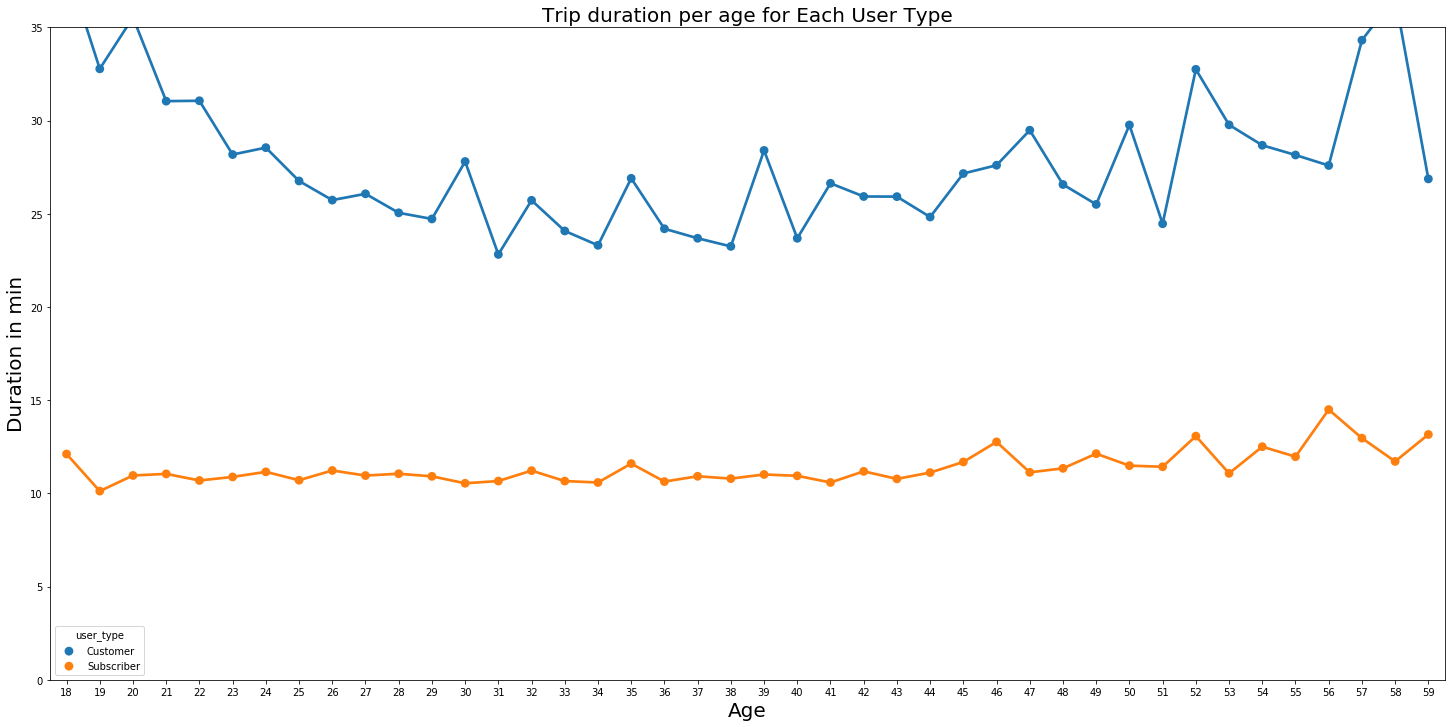

In [41]:
plt.figure(figsize=(25,12))
sb.pointplot(data=common_age, x='member_age', y='duration_min', hue = "user_type", ci=None)
plt.ylim(0,35)
plt.title("Trip duration per age for Each User Type", fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Duration in min', fontsize=20);
plt.show()

### Insight :
Based on our previous insights we spot a huge number of counts that shows subscribers are using GoBike, especially from Monday to Friday at 8 am and 5 pm, which seems that subscribers use the service as a transportation medium to go to their work or university. 
The last insight shows the subscribers who their age around 18 until 60 have a steady average trip duration which is around 12 min per ride, on the contrary, casual customers that they have a random average trip duration, as known for the age group that around 18 and 24 year old are having a commitment to college then after graduation they commit to their jobs, so in some sort, they have to respect their institution time.

## Conclusions:
After running the univariable analysis, we have found that most of the rides happened from Monday to Friday at 8 am and 5 pm that in some way related to institutions time, so after this insight we have done some more investigation in a  bivariable and multivariable level which lead us to conclude that most of the subscribers have a behavior that tends to use the Gobike service in a predictable way, like 12 min per ride and most of them have the age of going to the university or have a full-time job, too ride during the rush hours of the week when most people tend to go to their work or school. on the contrary, casual customers aim just for amusement or to get a bicycle experience so, their rides are longer and not related to the rush hours(most of them are on the weekend).
Unfortunately, we don't have a user-id that could help us track each individual behavior and maybe confirm or deny our hypothesis, the user_id could help us to study the subscribers in depth and see for example how many rides they took before joining the service and other questions.